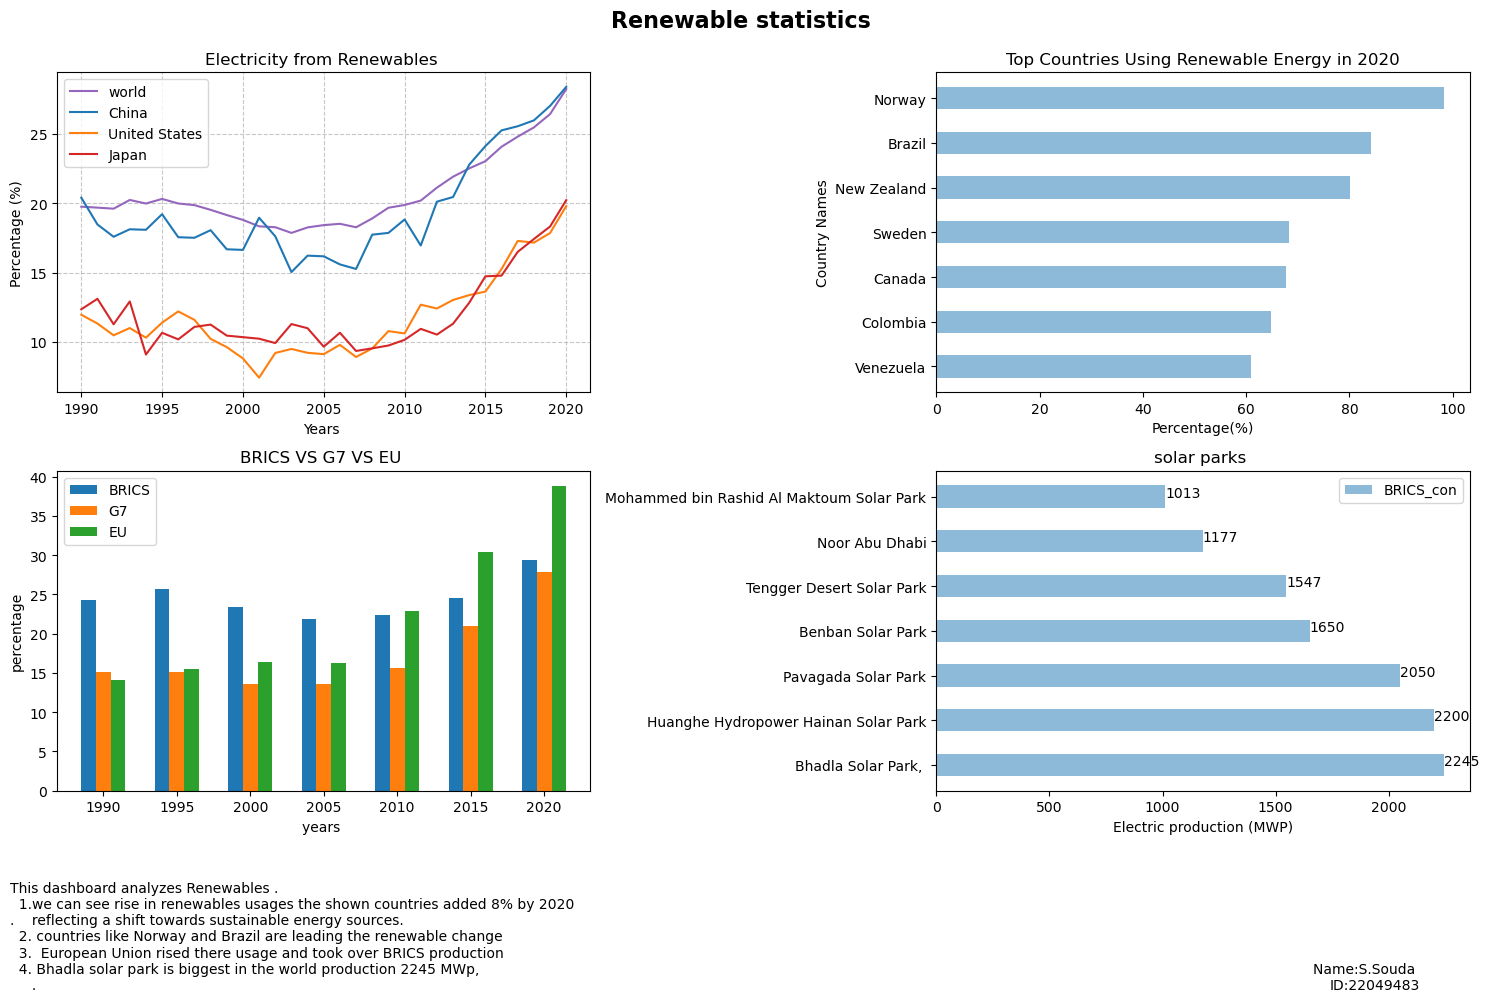

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ren = pd.read_excel("renewables.xlsx")
ren = ren.set_index(ren['name'])
ren = ren.drop('name', axis=1)

plant = pd.read_excel('solar.xlsx')
kilo = plant.head(7)


def figure1(ax, data):
    # Plotting the percentage of electricity from renewables for the whole world
    ax.plot(data.loc["World"], '#9467bd', label='world')  # Purple line for the world

    # Plotting the percentage of electricity from renewables for China
    ax.plot(data.loc["China"], '#1f77b4', label='China')  # Blue line for China

    # Plotting the percentage of electricity from renewables for the United States
    ax.plot(data.loc["United States"], '#ff7f0e', label='United States')  
    # Orange line for the United States

    # Plotting the percentage of electricity from renewables for Japan
    ax.plot(data.loc["Japan"], '#d62728', label='Japan')  # Red line for Japan

    # Setting the label for the x-axis as "Years"
    ax.set_xlabel("Years ")

    # Setting the label for the y-axis as "Percentage (%)"
    ax.set_ylabel('Percentage (%)')

    # Setting the title of the plot to indicate the subject
    ax.set_title('Electricity from Renewables ')

    # Adding a grid to the plot for better readability, 
    #with a dashed line style and partial transparency
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adding a legend to the plot to help identify which line corresponds to which region or country
    ax.legend()

def figure2(ax, data):
    # Sort the data in descending order based on renewable energy usage in 2020
        sorted_df = data.sort_values(by=2020, ascending=False)

    # Drop columns for years 1990 to 2019, keeping only data for 2020
        for i in range(1990, 2020):
            sorted_df.drop(i, axis=1, inplace=True)

    # Select and copy the top 7 countries with the highest renewable usage in 2020
        Head = sorted_df.head(7).copy()
        Head = Head.round(2)  # Round the data to two decimal places

    # Sort these top countries in ascending order for display
        Head = Head.sort_values(by=2020)

    # Create horizontal bar chart for the top countries
        ax.barh(Head.index, Head[2020], height=0.5, label="Top Countries", alpha=0.5)

    # Setting labels and title of the chart
        ax.set_xlabel('Percentage(%)')  # Label for x-axis
        ax.set_ylabel('Country Names')  # Label for y-axis
        ax.set_title('Top Countries Using Renewable Energy in 2020')  # Title of the chart
  
# Creating dataExtraction function
def dataExtraction(data, columnName):
    years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
    emptyList = []  # empty list

    for i in years:
        l = data[columnName].loc[i]
        emptyList = np.append(emptyList, l)
    return emptyList

def figure3(ax, data):
    # Define the years of interest for the analysis
    years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]

    # Transpose the data for easier extraction of country groups
    lft = data.T

    # Extract data for BRICS, G7, and the European Union using the dataExtraction function
    brics = dataExtraction(lft, "BRICS")
    g7 = dataExtraction(lft, "G7")
    eu = dataExtraction(lft, "European Union")

    # Creating bar charts for each group, adjusting the x-values for clarity
    ax.bar([x - 1 for x in years], brics, width=1, label='BRICS') 
    # Bars for BRICS, slightly shifted left
    ax.bar(years, g7, width=1, label='G7')  
    # Bars for G7, centered on the year
    ax.bar([x + 1 for x in years], eu, width=1, label='EU')  
    # Bars for EU, slightly shifted right
    
    ax.set_xlabel("years ")
    ax.set_ylabel("percentage")
    ax.set_title("BRICS VS G7 VS EU ")
    
    # Adding a legend to the plot to help identify each group
    ax.legend()

def figure4(ax, data):
    # Creating a horizontal bar chart
    ax.barh(data['Name'], data['MWp (Megawatts Peak Capacity)'], height=0.5, label="BRICS_con", alpha=0.5)
    # Each bar represents an entity (e.g., a country or a company) and its peak capacity in megawatts

    # Adding text annotations to each bar
    for index, value in enumerate(data['MWp (Megawatts Peak Capacity)']):
        ax.text(value, index, f'{value:}')  # This places the peak capacity value next to each bar
    
    ax.set_xlabel("Electric production (MWP)")
    ax.set_title("solar parks ")
    
    # Adding a legend to the plot
    ax.legend()  # Helps to identify the dataset represented by the bars
def runcode(data1, data2):
        # Create a single figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each chart on its corresponding subplot
        figure1(axes[0,0],data1)
        figure2(axes[0,1],data1)
        figure3(axes[1,0],data1)
        figure4(axes[1,1],data2)
        # Add "Hello World" text at the bottom of the entire figure
        story = "\nThis dashboard analyzes Renewables .\n" \
            "  1.we can see rise in renewables usages the shown countries added 8% by 2020\n. " \
            "   reflecting a shift towards sustainable energy sources.\n" \
            "  2. countries like Norway and Brazil are leading the renewable change\n" \
            "  3.  European Union rised there usage and took over BRICS production\n" \
            "  4. Bhadla solar park is biggest in the world production 2245 MWp,\n     ."
        student_details="Name:S.Souda \nID:22049483"
        Title="Renewable statistics "
        fig.text(0.01, 0.01, story, ha='left', fontsize=10)
        fig.text(0.95, 0.01, student_details, ha='right', fontsize=10)

        # Add a title at the top-center of the entire figure
        fig.suptitle(Title, fontsize=16, y=0.99,weight='bold')

        # Adjust layout for better spacing
        plt.tight_layout(rect=[0, 0.15, 1, 1]) # Adjust the rect parameter to leave space at the bottom

        # Save the entire figure as a single PNG file with 300dpi resolution
        plt.savefig('22049483.png', dpi=300)
        #Uncomment line 138 if you want to see output while running this code and comment line 136 if you do not want to generate png.
        #plt.show()
runcode(ren, kilo)